### Predicción de precios de casas

In [2]:
#Importando librerias a utilizar
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

Usando sclicing con NumPy separar los datos en 2 datasets:
entrenamiento(80%)
validación y pruebas(20%) 

In [3]:
#Cargando data del set de datos
data = np.load('./proyecto_training_data.npy') #Extraer data 

sliceSize = int(len(data) * .8) #Calculo para saber cual es el 80% de los datos 
TrainingData = data[:sliceSize] #80% del total de datos para training data
TestData = data[sliceSize:] #20% del total de los datos para test data

pandas_df = pd.DataFrame(TrainingData,columns=['PrecioVenta','Calidad','PiesCuadrados','Habitaciones','AñoConstruccion','PiesCalle'])
pandas_df

,PrecioVenta,Calidad,PiesCuadrados,Habitaciones,AñoConstruccion,PiesCalle
0,208500.0,7.0,856.0,8.0,2003.0,65.0
1,181500.0,6.0,1262.0,6.0,1976.0,80.0
2,223500.0,7.0,920.0,6.0,2001.0,68.0
3,140000.0,7.0,961.0,7.0,1915.0,60.0
4,250000.0,8.0,1145.0,9.0,2000.0,84.0
...,...,...,...,...,...,...
1163,108959.0,4.0,1258.0,6.0,1969.0,60.0
1164,194000.0,5.0,1432.0,5.0,1978.0,NaN
1165,233170.0,7.0,1502.0,7.0,2009.0,79.0
1166,245350.0,8.0,1694.0,7.0,2008.0,64.0


## Análisis exploratorio de datos.

### Para cada variable en el dataset calcular((usando numpy o pandas):


1.   Media
2.   Valor Máximo
3.   Valor Mínimo
4.   Rango(peak to peak, no el rango del tensor que por ser verctor sabemos que es 1)
5.   Desviación estándar

In [4]:
resumen = pandas_df.describe()

max_df=pd.DataFrame([resumen.iloc[7]])
min_df=pd.DataFrame([resumen.iloc[3]])
rango = max_df.values - min_df.values #valor maximo - valor minimo de cada variable
rango_df = pd.DataFrame(rango,columns=['PrecioVenta','Calidad','PiesCuadrados','Habitaciones','AñoConstruccion','PiesCalle'])
res = (resumen.iloc[[1,7,3]].append(rango_df)).append(resumen.iloc[2])

res

,PrecioVenta,Calidad,PiesCuadrados,Habitaciones,AñoConstruccion,PiesCalle
mean,180590.277397,6.101027,1156.323630,6.485445,1971.451199,69.946985
max,755000.000000,10.000000,3228.000000,14.000000,2010.000000,313.000000
min,34900.000000,1.000000,334.000000,2.000000,1875.000000,21.000000
0,720100.000000,9.000000,2894.000000,12.000000,135.000000,292.000000
std,78815.697902,1.378025,373.780374,1.609141,29.951707,23.478161


### Para cada variable en el dataset usar seaborn(función distplot https://seaborn.pydata.org/generated/seaborn.distplot.html)  para graficar  un histograma de la variable.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


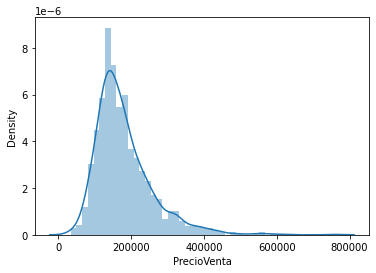

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


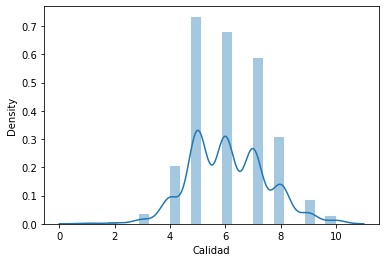

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


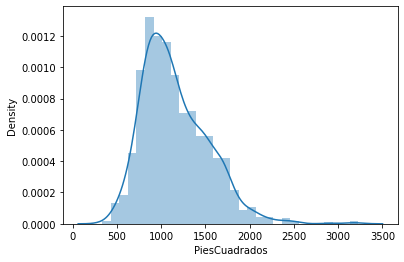

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


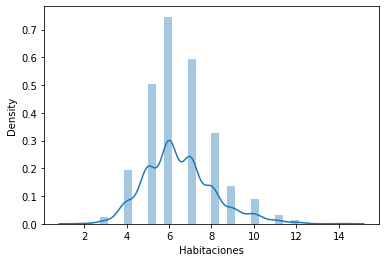

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


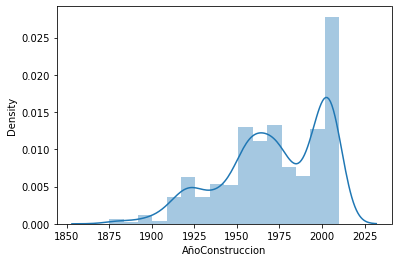

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


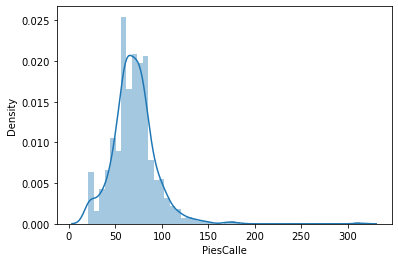

In [18]:
Vars= pandas_df.T

def histograma(col):
  fig  = plt.figure()
  ax = fig.add_subplot(1,1,1)
  sns.distplot(Vars.loc[col],kde = True)
  plt.show()

histograma('PrecioVenta')
histograma('Calidad')
histograma('PiesCuadrados')
histograma('Habitaciones')
histograma('AñoConstruccion')
histograma('PiesCalle')



### Para cada variable independiente x :

1.   Calcular el coeficiente de correlación entre x y y
2.   graficar x vs y(scatterplot) usando matplotlib
3.   Colocar el coeficiente de correlación y colocarlo  como parte del título de la gráfica. 

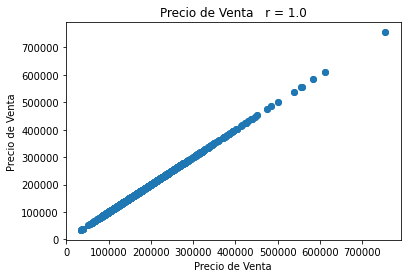

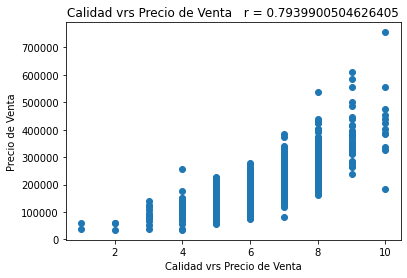

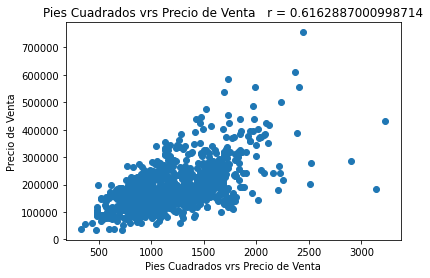

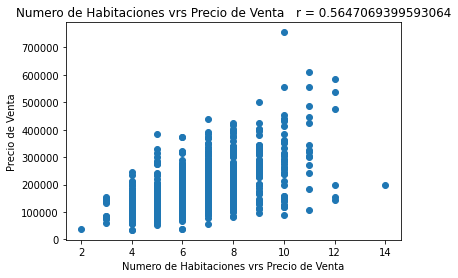

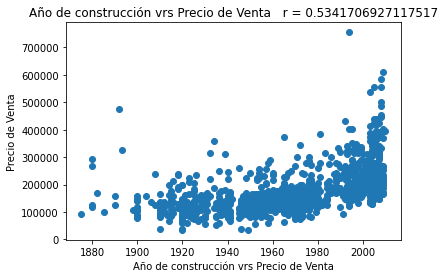

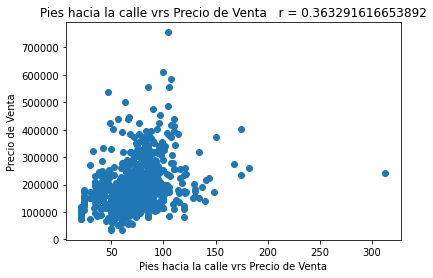

In [55]:
def graficaCorrelacion(variable, titulo):
  temp =(pandas_df[['PrecioVenta', variable]]).dropna() #quitar Nan en las dos variables a analizar para que coincida el numero de datos
  y=(temp.T).loc['PrecioVenta']
  x=(temp.T).loc[variable]

  correlacion = np.corrcoef(x, y)[1, 0]
  fig = plt.figure()
  ax = fig.add_subplot(1, 1, 1,)
  ax.scatter(x, y)
  ax.set_title(titulo +'   r = '+ str(correlacion))
  plt.xlabel(titulo) 
  plt.ylabel('Precio de Venta') 
  plt.show()

graficaCorrelacion('PrecioVenta', "Precio de Venta")
graficaCorrelacion('Calidad', "Calidad vrs Precio de Venta")
graficaCorrelacion('PiesCuadrados', "Pies Cuadrados vrs Precio de Venta")
graficaCorrelacion('Habitaciones', "Numero de Habitaciones vrs Precio de Venta")
graficaCorrelacion('AñoConstruccion', "Año de construcción vrs Precio de Venta")
graficaCorrelacion('PiesCalle', "Pies hacia la calle vrs Precio de Venta")

### Basado en la gráfica y el coeficiente de correlación  de cada par x,y elegir  las 2 variables con más potencial predictivo(la 2 que presentan mayor correlación).

Se elige las variables calidad y pies cuadrados
*   Variable Calidad correlación r = 0.7939
*   Variable Pies Cuadrados correlación r = 0.6162 




## Crear una función para entrenar un modelo de regresión lineal de una variable 
y = mx +b.